Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [129]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [131]:
import keras
keras.__version__

'2.11.0'

In [132]:
keras.backend.backend()

'tensorflow'

Давайте попробуем получить датасет mnist и проанализировать его содержимое.

In [133]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
import numpy as np


(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 0


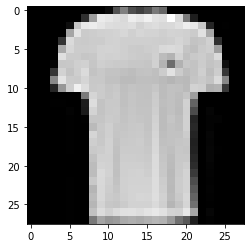

In [134]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [135]:
X_train.min(), X_train.max()

(0, 255)

In [136]:
# Нормировка
print((X_train / 255.0).min(), (X_train / 255.0).max())
print((X_train / 127.5 - 1).min(), (X_train / 127.5 - 1).max())

0.0 1.0
-1.0 1.0


In [137]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [138]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [139]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
len(X_train[0])

784

### **Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети.

In [141]:
from keras.layers import Dense
from keras.models import Sequential

In [142]:
from keras.utils.np_utils import to_categorical


y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [143]:
X_train.shape

(60000, 784)

In [144]:
# влияние количества нейронов скрытого слоя на качество обучения двухслойной сети
for n_amount in [12,32,40,64]:
    model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(n_amount, activation='relu'),
    Dense(10, activation='sigmoid')
])
    
    model.compile(
                  optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                )
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    print(f"Количество нейронов скрытого слоя сети = {n_amount}, Accuracy: {history.history['accuracy']}")

Количество нейронов скрытого слоя сети = 12, Accuracy: [0.7520166635513306, 0.8432333469390869, 0.8592333197593689, 0.8666999936103821, 0.873283326625824]
Количество нейронов скрытого слоя сети = 32, Accuracy: [0.7619166374206543, 0.8456500172615051, 0.8614500164985657, 0.8669999837875366, 0.8745499849319458]
Количество нейронов скрытого слоя сети = 40, Accuracy: [0.7691333293914795, 0.8496166467666626, 0.8618000149726868, 0.8686166405677795, 0.8783666491508484]
Количество нейронов скрытого слоя сети = 64, Accuracy: [0.772683322429657, 0.8477833271026611, 0.8607666492462158, 0.8673499822616577, 0.8763333559036255]


**бОльшая ширина слоя повышает качество обучения двухслойной сети**

In [145]:
# влияние количества слоев на качество обучения
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])
model.summary()
    
model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'],
            )
    
history = model.fit(X_train, y_train,
                epochs=5,
                batch_size=256,
                verbose=0,
                validation_data=(X_test, y_test)
                )
print(history.history['accuracy'])

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_323 (Dense)           (None, 64)                50240     
                                                                 
 dense_324 (Dense)           (None, 32)                2080      
                                                                 
 dense_325 (Dense)           (None, 32)                1056      
                                                                 
 dense_326 (Dense)           (None, 32)                1056      
                                                                 
 dense_327 (Dense)           (None, 32)                1056      
                                                                 
 dense_328 (Dense)           (None, 32)                1056      
                                                                 
 dense_329 (Dense)           (None, 32)              

2 слоя - Accuracy: [0.7771333456039429, 0.8469333052635193, 0.8633333444595337, 0.8705499768257141, 0.8750500082969666]
3 слоя - Accuracy: [0.7404999732971191, 0.8462833166122437, 0.8603166937828064, 0.8668500185012817, 0.8731666803359985]
5 cлоев - Accuracy:[0.6978999972343445, 0.8394166827201843, 0.8553500175476074, 0.8622999787330627, 0.871483325958252]
10 cлоев - Accuracy: [0.6361166834831238, 0.8196666836738586, 0.8446999788284302, 0.8572166562080383, 0.8621000051498413]

**Увеличение количества слоев при примерно одинаковом количестве обучаемых параметров не способствует увеличению качества обучения**

In [146]:
# влияние количества эпох на качество обучения сети
for n_epochs in [5,10,20]:
    model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])
    
    model.compile(
                  optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                )
    
    history = model.fit(X_train, y_train,
                    epochs=n_epochs,
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    print(f"Количество эпох = {n_epochs}, Accuracy: {history.history['accuracy']}")

Количество эпох = 5, Accuracy: [0.7674333453178406, 0.8494333624839783, 0.864466667175293, 0.868066668510437, 0.87663334608078]
Количество эпох = 10, Accuracy: [0.7690333127975464, 0.8472999930381775, 0.8603666424751282, 0.8677833080291748, 0.8750666379928589, 0.8780999779701233, 0.8823333382606506, 0.8859333395957947, 0.8888999819755554, 0.8899499773979187]
Количество эпох = 20, Accuracy: [0.7723666429519653, 0.8461999893188477, 0.8606333136558533, 0.866433322429657, 0.8750166893005371, 0.8786666393280029, 0.8830500245094299, 0.8863999843597412, 0.8892166614532471, 0.8928333520889282, 0.8952500224113464, 0.896049976348877, 0.8986166715621948, 0.9028666615486145, 0.9042333364486694, 0.9063000082969666, 0.9061166644096375, 0.9080666899681091, 0.910183310508728, 0.912850022315979]


**Увеличение количества эпох положительно влияет на качество обучения (однако большое количество эпох приводит к большим временным затратам)**

In [147]:
# влияние размера батча на качество обучения сети
for n_batch in [100,256,512,1000]:
    model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])
    
    model.compile(
                  optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                )
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=n_batch,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    
    print(f"Размер батча = {n_batch}, Accuracy: {history.history['accuracy']}")

Размер батча = 100, Accuracy: [0.7997166514396667, 0.8557166457176208, 0.868066668510437, 0.8761666417121887, 0.8816666603088379]
Размер батча = 256, Accuracy: [0.7757166624069214, 0.8492000102996826, 0.8637499809265137, 0.8679333329200745, 0.8765333294868469]
Размер батча = 512, Accuracy: [0.716866672039032, 0.8348333239555359, 0.8518999814987183, 0.8607500195503235, 0.8657166957855225]
Размер батча = 1000, Accuracy: [0.6468833088874817, 0.8118333220481873, 0.8337833285331726, 0.8445500135421753, 0.854533314704895]


**Чем меньше размер батча, тем лучше результаты обучения**

In [148]:
from keras import optimizers as op

In [149]:
# влияние выбора оптимизатора на качество обучения сети
import tensorflow as tf
tf.random.set_seed(1)

for opt in [op.SGD(), op.RMSprop(), op.Adagrad(), op.Adam(), op.Nadam(), op.Adamax()]:
    model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])
    
    model.compile(
                  optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                )
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    print(f"Оптимизатор = {opt.get_config()['name']}, Accuracy: {history.history['accuracy']}")

Оптимизатор = SGD, Accuracy: [0.5062500238418579, 0.687583327293396, 0.7430499792098999, 0.7724999785423279, 0.7914166450500488]
Оптимизатор = RMSprop, Accuracy: [0.7591166496276855, 0.8350833058357239, 0.8521166443824768, 0.8625500202178955, 0.8693333268165588]
Оптимизатор = Adagrad, Accuracy: [0.31279999017715454, 0.569766640663147, 0.6582833528518677, 0.6877833604812622, 0.7082499861717224]
Оптимизатор = Adam, Accuracy: [0.7707666754722595, 0.8484166860580444, 0.8620499968528748, 0.8677999973297119, 0.8752333521842957]
Оптимизатор = Nadam, Accuracy: [0.7681833505630493, 0.8490666747093201, 0.8624833226203918, 0.8703500032424927, 0.8783000111579895]
Оптимизатор = Adamax, Accuracy: [0.7249333262443542, 0.8271499872207642, 0.8426833152770996, 0.8509166836738586, 0.8561499714851379]


**Наилучшие результаты продемонстрировал оптимизатор Adam. Попробуем изменить параметры настройки самого оптимизатора**

In [150]:
for l_rate in [0.05,0.01,0.001]:
    model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])
    
    model.compile(
                  optimizer=op.Adam(learning_rate=l_rate,amsgrad=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                )
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=n_batch,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    print(f"Оптимизатор Adam, скорость обучения = {l_rate}, Accuracy: {history.history['accuracy']}")

Оптимизатор Adam, скорость обучения = 0.05, Accuracy: [0.6414999961853027, 0.8159000277519226, 0.8405166864395142, 0.8506333231925964, 0.855733335018158]
Оптимизатор Adam, скорость обучения = 0.01, Accuracy: [0.7173833250999451, 0.8401333093643188, 0.8577166795730591, 0.8658166527748108, 0.8694000244140625]
Оптимизатор Adam, скорость обучения = 0.001, Accuracy: [0.652899980545044, 0.8173333406448364, 0.8377166390419006, 0.8520500063896179, 0.8590166568756104]


**Наилучшие результаты оптимизатор продемонстрировал при скорости обучения 0.01, и использовании AMSGrad варианта**

Таким образом, мы выявили наиболее оптимальные параметры для нашей сети:
    - Кол-во слоев: 2 (при числе параметров ~ 50 000)
    - Кол-во нейронов в скрытом слое: 40
    - Кол-во эпох: 20
    - Размер батча: 100
    - Оптимизатор: Adam (l_rate=0.01, ARMSgrad=True)
    
Попробуем обучить модель на этих параметрах.

In [151]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(40, activation='relu'),
    Dense(10, activation='sigmoid')
])
    
model.compile(
    optimizer=op.Adam(learning_rate=0.01,amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
    
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=100,
                    verbose=0,
                    validation_data=(X_test, y_test)
                   )

In [152]:
history.history['accuracy']

[0.805733323097229,
 0.8511000275611877,
 0.8616666793823242,
 0.8662833571434021,
 0.8721166849136353,
 0.8756166696548462,
 0.8790666460990906,
 0.8825333118438721,
 0.8839333057403564,
 0.8861500024795532,
 0.8864833116531372,
 0.8896999955177307,
 0.8914333581924438,
 0.8916666507720947,
 0.8928333520889282,
 0.8944000005722046,
 0.8948333263397217,
 0.8961666822433472,
 0.8945000171661377,
 0.8963500261306763]

In [153]:
history.history['val_accuracy']

[0.8342000246047974,
 0.8521000146865845,
 0.85589998960495,
 0.8537999987602234,
 0.8525999784469604,
 0.8592000007629395,
 0.8568999767303467,
 0.8629000186920166,
 0.8672999739646912,
 0.8683000206947327,
 0.8636999726295471,
 0.8623999953269958,
 0.8677999973297119,
 0.8561999797821045,
 0.8668000102043152,
 0.873199999332428,
 0.8661999702453613,
 0.8683000206947327,
 0.8712000250816345,
 0.8727999925613403]

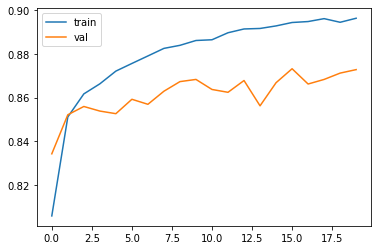

In [154]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

### **Оценка обученности нейронной сети**

In [155]:
loss, metric = model.evaluate(X_test, y_test, batch_size=100)
loss, metric

100/100 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8728


(0.3883098363876343, 0.8727999925613403)

### **Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознавания объекта на фотографии например.
Вот код для этих целей.

В качестве аргумента здесь указывается массив данных.

In [157]:
X_test[0][None].shape

(1, 784)

In [158]:
predictions = model.predict(X_test[0][None])
predictions

1/1 [==============================] - 0s 45ms/step


array([[2.6031593e-03, 5.0173374e-04, 2.3218998e-04, 7.6389724e-06,
        3.1500930e-04, 1.1155446e-01, 2.1750294e-04, 7.1573770e-01,
        5.3397856e-05, 9.9928075e-01]], dtype=float32)

In [159]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([9], dtype=int64)

In [160]:
y_test_labels[:3]

array([9, 2, 1], dtype=uint8)

-

1/1 [==============================] - 0s 20ms/step


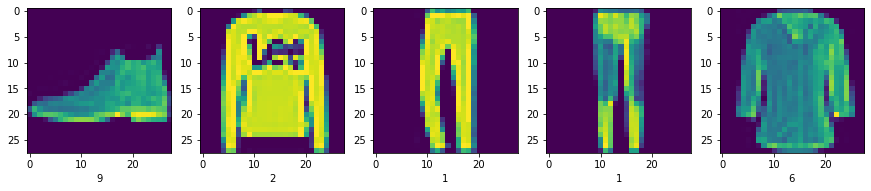

In [161]:
N = 5
y_pred = model.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [162]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)